# Capstone Project: webProfiler AI Final 2.3

In the field of cybersecurity, penetration testing, or pentesting, is a critical process in which security professionals simulate cyberattacks on a system, network, or application to identify and exploit vulnerabilities. This proactive approach to security helps organizations uncover weaknesses before malicious actors can exploit them, allowing them to take appropriate measures to secure their digital assets.


Given the ever-evolving and complex nature of cyber threats, it is essential to use tools and techniques that can assist in streamlining and improving the efficiency of the pentesting process. One of the key steps in pentesting is reconnaissance, which involves gathering information about the target system to identify potential attack vectors. In this context, a tool capable of automatically classifying websites into categories based on visual features can significantly aid pentesters by reducing the time spent on manual analysis and enabling them to focus on more critical aspects of their work.

This tool can offer several benefits to the **pentesting** (penetration testing) process, which are security tests performed to identify and exploit vulnerabilities in systems and applications:

1. **Target prioritization**: By classifying websites into different categories, the tool can help pentesters prioritize their targets and focus their efforts on those sites that are more relevant or prone to having vulnerabilities, such as web applications or login pages.

2. **Automation and efficiency**: The automatic classification of websites based on images allows pentesters to save time and resources in the reconnaissance phase, enabling them to focus on more critical aspects of the pentesting process.

3. **Anomaly identification**: The tool can be useful in quickly identifying websites with unusual features, such as custom 404 pages or old-looking sites, which might require special attention during the pentesting process.

4. **Phishing page detection**: Classifying login pages can be helpful in identifying potential phishing attacks or spoofed websites that attempt to trick users into providing their credentials.

##Model

We have chosen the VGG11 net for our task in this notebook. The **VGG-11 classifier** pre-trained on ImageNet is chosen for several reasons:

1. **Proven performance**: VGG-11 is a convolutional neural network (CNN) architecture that has demonstrated high performance in image classification tasks, making it a solid choice for this kind of project.

2. **Transfer learning**: The VGG-11 model pre-trained on ImageNet allows leveraging prior knowledge about visual features, which can facilitate and speed up the training process on the website screenshot dataset.


3. **Flexibility**: The VGG-11 architecture is easy to adapt to specific classification problems, such as this project's, by modifying the final layer to have the appropriate number of output neurons.

4. **Wide availability and support**: VGG-11 is a well-known and widely-used architecture in the deep learning community, which means there are plenty of resources and support available to help with its implementation.

##Dataset

We will be working with the dataset available at Kaggle: Pentest Screenshots ( https://www.kaggle.com/datasets/altf42600/pentest-screensots ). This dataset has been modified to provide better flexibility for our project. Instead of using a CSV file that associated each image file with its category flag, we have rearranged the files into separate folders, one for each category. This new structure allows for greater flexibility and ease of use during the training process.

**VERY IMPORTANT**: The original dataset contained a CSV file where the same image was assigned to multiple categories. We have rectified this by assigning only one category to each image. For instance, a login form was previously classified as both a web application and a login. Similarly, an old login was categorized as an old site, login, and web application. Such multiple categorizations created confusion in the training algorithm, which prompted us to revise the criteria. Therefore, any classification issues may arise due to the data rather than the algorithm.

**IMPORTANT II:** We are going to use one less category, leaving out the webapp category as it adds noise to the classification and does not provide significant information to the pentesting process. All of them are webapps, and we are interested in being able to differentiate the old ones, login forms, parked hosts, and custom 404s. If it is really a webapp, it does not add much to the information we need, as we expect them to be mostly surface-level web applications and we need to be able to filter them.

###Categories

The categories for the website classification project are described as follows:

1. **Custom404**: These are websites that display a custom 404 error page when the requested content is not found. Custom 404 pages often have unique designs and may include helpful information or navigation links for users.
2. **Login**: This category includes websites with login pages, where users need to enter their credentials (username and password) to access restricted content or user-specific features. Login pages are often targeted by attackers to perform credential theft or brute-force attacks.
4. **OldLooking**: OldLooking websites are those that appear to have outdated designs, layouts, or technologies. These sites may not have been updated for a long time and may be more susceptible to security vulnerabilities due to the use of deprecated or unsupported technologies.
5. **Parked**: Parked websites are domain placeholders that usually contain minimal content and are not actively being used for any specific purpose. These sites might display a "coming soon" message, advertisements, or simply the domain registrar's information. Parked sites typically pose a lower security risk, as they lack functionality and user interaction.


###Pre-processing


Debian style :)
```

Data source and pre procesing:
description of label.csv
filename,custom404,login,webapp,oldlooking,parked,evaluation

Pre-processing was necessary because some images met multiple conditions. The data is described in label.csv, but some images were assigned to two or more categories, which created noise in the model. To address this issue, we revised the data by assigning only one category to each image, ensuring that the model's accuracy was not negatively affected by multiple categorizations

#cut the last column (evaluation). only use:
cat labels.csv | awk -F, {'print $1,$2,$3,$4,$5,$6'} | sed -e "s/ /,/g" >l2.csv

#replace the multiple criterions in the labels file.

sed -i "s/FALSE,TRUE,FALSE,FALSE,TRUE/FALSE,TRUE,FALSE,FALSE,FALSE/g" l2.csv
sed -i "s/TRUE,TRUE,FALSE,FALSE,FALSE/FALSE,TRUE,FALSE,FALSE,FALSE/g" l2.csv
sed -i "s/TRUE,FALSE,FALSE,TRUE,FALSE/FALSE,FALSE,FALSE,TRUE,FALSE/g" l2.csv
sed -i "s/FALSE,TRUE,FALSE,TRUE,FALSE/FALSE,TRUE,FALSE,FALSE,FALSE/g" l2.csv
sed -i "s/FALSE,FALSE,FALSE,TRUE,TRUE/FALSE,FALSE,FALSE,TRUE,FALSE/g" l2.csv
sed -i "s/FALSE,FALSE,TRUE,TRUE,FALSE/FALSE,FALSE,FALSE,TRUE,FALSE/g" l2.csv
sed -i "s/FALSE,TRUE,TRUE,FALSE,FALSE/FALSE,TRUE,FALSE,FALSE,FALSE/g" l2.csv
sed -i "s/TRUE,FALSE,TRUE,FALSE,FALSE/TRUE,FALSE,FALSE,FALSE,FALSE/g" l2.csv
sed -i "s/TRUE,TRUE,FALSE,TRUE,FALSE/FALSE,TRUE,FALSE,FALSE,FALSE/g" l2.csv
sed -i "s/TRUE,TRUE,TRUE,FALSE,FALSE/FALSE,TRUE,FALSE,FALSE,FALSE/g" l2.csv
sed -i "s/TRUE,FALSE,TRUE,TRUE,FALSE/FALSE,FALSE,FALSE,TRUE,FALSE/g" l2.csv
sed -i "s/FALSE,TRUE,TRUE,TRUE,FALSE/FALSE,FALSE,FALSE,TRUE,FALSE/g" l2.csv

#create one folder per category.
mkdir images/custom404/
mkdir images/login/
mkdir images/webapp/ 
mkdir images/oldlooking/
mkdir images/parked/ 

#move the files to the corresponding folder

custom404

for i in $(cat l2.csv); do file=$(echo $i| awk -F, {'print $1'}); flag=$(echo $i| awk -F, {'print $2'}); echo $file $flag ;if [ "$flag" == "TRUE" ] ; then mv images_full_size/$file images/custom404/ ; fi ;done

login

for i in $(cat l2.csv); do file=$(echo $i| awk -F, {'print $1'}); flag=$(echo $i| awk -F, {'print $3'}); echo $file $flag ;if [ "$flag" == "TRUE" ] ; then mv images_full_size/$file images/login/ ; fi ;done

webapp

for i in $(cat l2.csv); do file=$(echo $i| awk -F, {'print $1'}); flag=$(echo $i| awk -F, {'print $4'}); echo $file $flag ;if [ "$flag" == "TRUE" ] ; then mv images_full_size/$file images/webapp/ ; fi ;done

oldlooking

for i in $(cat l2.csv); do file=$(echo $i| awk -F, {'print $1'}); flag=$(echo $i| awk -F, {'print $5'}); echo $file $flag ;if [ "$flag" == "TRUE" ] ; then mv images_full_size/$file images/oldlooking/ ; fi ;done

parked


for i in $(cat l2.csv); do file=$(echo $i| awk -F, {'print $1'}); flag=$(echo $i| awk -F, {'print $6'}); echo $file $flag ;if [ "$flag" == "TRUE" ] ; then mv images_full_size/$file images/parked/ ; fi ;done


Then I resize the images to 224x224 pixels, as specified by the VGG-11 model.

cd images
find . -iname '*.png' -exec mogrify -resize 224x224! {} \;

```



## Implementation

We have chosen the VGG11 net for our task in this notebook.

In [1]:
import torch
import torchvision
import torch.nn as nn
import numpy as np
import torchvision.datasets
from torchvision import transforms
from torch.utils.data import Subset
from torch.utils.data import DataLoader
import time, copy
import matplotlib.pyplot as plt
import sklearn.metrics as metrics


# device config (train our model on GPU if it is available which is much faster)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

# Imports a VGG-11 model pretrained on ImageNet
#vgg11 = torchvision.models.vgg11(pretrained=True, progress=True)
vgg11 = torchvision.models.vgg11(pretrained=True, progress=True)
vgg11

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG11_Weights.IMAGENET1K_V1`. You can also use `weights=VGG11_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg11-8a719046.pth" to /root/.cache/torch/hub/checkpoints/vgg11-8a719046.pth
100%|██████████| 507M/507M [00:02<00:00, 186MB/s]


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU(inplace=True)
    (13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): ReLU(inplace=True)
    (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
 

## Dataset


In [3]:
!wget https://surf.bilard.app/reports/testing2/images_no_webapps.tar.gz
!tar -xzf images_no_webapps.tar.gz


--2023-04-18 07:02:59--  https://surf.bilard.app/reports/testing2/images_no_webapps.tar.gz
Resolving surf.bilard.app (surf.bilard.app)... 104.26.9.28, 104.26.8.28, 172.67.72.181, ...
Connecting to surf.bilard.app (surf.bilard.app)|104.26.9.28|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 234189371 (223M) [application/x-gzip]
Saving to: ‘images_no_webapps.tar.gz’

images_no_webapps.t 100%[===================>] 223.34M  2.05MB/s    in 4m 7s   

2023-04-18 07:07:11 (926 KB/s) - ‘images_no_webapps.tar.gz’ saved [234189371/234189371]



In [5]:
!ls
!ls images

images	images_no_webapps.tar.gz  sample_data
custom404  login  oldlooking  parked


In [6]:
from torchvision.datasets import ImageFolder
from torch.utils.data import random_split

#Code segment to generate transformations ONLY on the training set.
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize(224),
        transforms.RandomApply([transforms.RandomResizedCrop(224, scale=(0.8, 1.2))], p=0.75), # random zoom 
        transforms.ColorJitter(brightness=(0.8, 1.2), contrast=(0.8, 1.0), saturation=(0.5, 1.0)), #  randome brig contrast saturation
        transforms.RandomErasing(p=0.75, scale=(0.15, 0.15)), 
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
}


dataset = ImageFolder(root='/content/images/')

train_size = int(np.floor(0.60 * len(dataset)))
val_size = int(np.ceil(0.20 * len(dataset)))
test_size = len(dataset) - train_size - val_size
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

#tranformations
train_dataset.dataset.transform = data_transforms['train']
val_dataset.dataset.transform = data_transforms['val']
test_dataset.dataset.transform = data_transforms['test']

# Create DataLoaders
batch_size = 100
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)




In [7]:
# We will create DataLoaders just like before with a batch size of 100
dataloaders = {'train': train_loader,
               'val': val_loader,
               'test': test_loader}

dataset_sizes = {'train': len(train_dataset),
                 'val': len(val_dataset),
                 'test': len(test_dataset)}
print(f'dataset_sizes = {dataset_sizes}')

dataset_sizes = {'train': 8450, 'val': 1691, 'test': 1126}


## Visualization


In [8]:
# First determine the total number of classes:
img_labels = set()
for _, labels in dataloaders["train"]:
    for label in labels:
        img_labels.add(label.item())
print(len(img_labels))
print(img_labels)
img_labels_name = dataset.classes
print(img_labels_name)

4
{0, 1, 2, 3}


In [9]:
# plot a digit ground truth and autoencoding
def view_imgs_class(label, count = 1):
    fig = plt.figure()
    idx = 1
    for inputs, labels in dataloaders["test"]:
        for i, input in enumerate(inputs):
            # we only want to view a certain class
            if (labels[i] != label):
                continue
            # plot the ground truth
            # ax = fig.add_subplot(1, count, idx)
            input = input.cpu().detach().permute((1,2,0))
            plt.imshow(input)
            idx += 1
            if idx > count:
                break
        if idx > count:
            break

def view_imgs_all():
    for i in range(len(img_labels)):
        view_imgs_class(i)

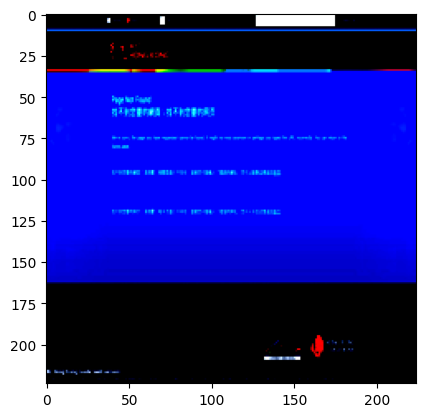

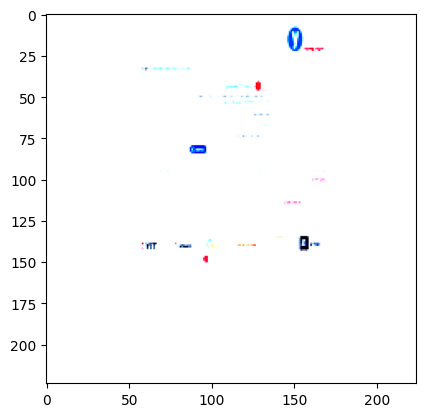

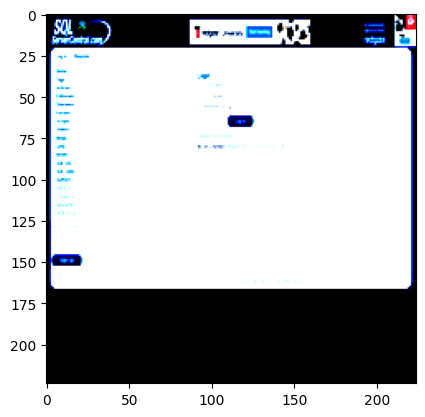

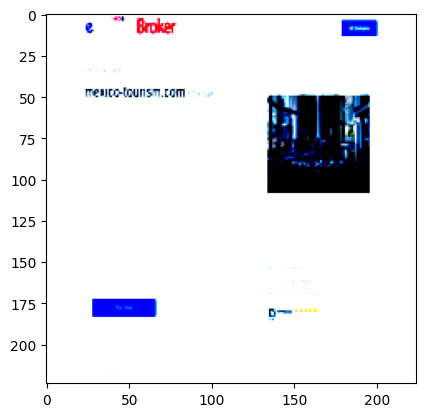

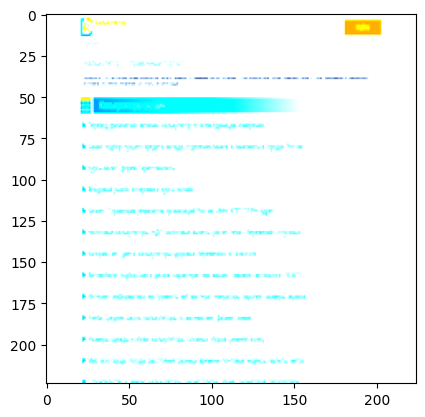

In [ ]:
view_imgs_all()

## Augmenting the Model


In [10]:
# Freeze the weights of the network
for param in vgg11.parameters():
    param.requires_grad = False

# get features
in_features = vgg11.classifier[6].in_features

###Custom Classifier
#This is to modify the dropout!
new_classifier = nn.Sequential(
    nn.Linear(in_features=25088, out_features=4096, bias=True),
    nn.ReLU(inplace=True),
    nn.Dropout(p=0.5, inplace=False),  
    nn.Linear(in_features=4096, out_features=4096, bias=True),
    nn.ReLU(inplace=True),
    nn.Dropout(p=0.5, inplace=False),  
    nn.Linear(in_features=4096, out_features=len(img_labels), bias=True) 
)

# Replace the classifier in the VGG-11 model with the new custom classifier.

vgg11.classifier = new_classifier
vgg11.to(device)
vgg11

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU(inplace=True)
    (13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): ReLU(inplace=True)
    (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
 

## Training the Model


In [11]:
# From https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html

def train_classification_model(model, dataloaders, dataset_sizes, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict()) # keep the best weights stored separately
    best_acc = 0.0
    best_epoch = 0

    ################### L1 regularization ####################
    l1_regularization = None  # 
    l1_lambda = 1e-4  

    # Each epoch has a training, validation, and test phase
    phases = ['train', 'val', 'test']
    
    # Keep track of how loss and accuracy evolves during training
    training_curves = {}
    for phase in phases:
        training_curves[phase+'_loss'] = []
        training_curves[phase+'_acc'] = []
    
    for epoch in range(num_epochs):
        print(f'\nEpoch {epoch+1}/{num_epochs}')
        print('-' * 10)

        for phase in phases:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(predictions == labels.data)
 
            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]
            training_curves[phase+'_loss'].append(epoch_loss)
            training_curves[phase+'_acc'].append(epoch_acc)


            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, predictions = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)
                    
                    #Penalization L1 
                    l1_regularization = torch.tensor(0.0, requires_grad=True).to(device)
                    for name, param in model.named_parameters():
                        if 'weight' in name:
                            l1_regularization += torch.norm(param, 1)

                    # Add penalization L1
                    loss += l1_lambda * l1_regularization
            
                    # backward + update weights only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()
            print(f'{phase:5} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            # deep copy the model if it's the best accuracy (bas
            if phase == 'val' and epoch_acc > best_acc:
              best_epoch = epoch
              best_acc = epoch_acc
              best_model_wts = copy.deepcopy(model.state_dict())

    time_elapsed = time.time() - since
    print(f'\nTraining complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val Acc: {best_acc:4f} at epoch {best_epoch}')

    # load best model weights
    model.load_state_dict(best_model_wts)
    
    return model, training_curves


### Phase 1


In [13]:
learning_rate = 0.001
num_epochs = 25

In [14]:
# loss and optimizer
criterion = nn.CrossEntropyLoss() # CrossEntropyLoss for classification!

#L2 Regularization
weight_decay = 1e-4

optimizer = torch.optim.Adam(vgg11.parameters(), lr=learning_rate, weight_decay=weight_decay)
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.95)

# Train the model. We also will store the results of training to visualize
vgg11_phase1, training_curves_phase1 = train_classification_model(vgg11, dataloaders, dataset_sizes, 
                                     criterion, optimizer, scheduler, num_epochs=num_epochs)


Epoch 1/25
----------
train Loss: 27.3586 Acc: 0.7031
val   Loss: 19.8486 Acc: 0.8007
test  Loss: 19.8742 Acc: 0.7957

Epoch 2/25
----------
train Loss: 18.9315 Acc: 0.8038
val   Loss: 18.3926 Acc: 0.8196
test  Loss: 18.4197 Acc: 0.8250

Epoch 3/25
----------
train Loss: 18.1048 Acc: 0.8254
val   Loss: 17.9756 Acc: 0.8084
test  Loss: 17.9781 Acc: 0.8153

Epoch 4/25
----------
train Loss: 17.7237 Acc: 0.8466
val   Loss: 17.7013 Acc: 0.8131
test  Loss: 17.7017 Acc: 0.8224

Epoch 5/25
----------
train Loss: 17.4767 Acc: 0.8548
val   Loss: 17.5875 Acc: 0.8149
test  Loss: 17.6015 Acc: 0.8242

Epoch 6/25
----------
train Loss: 17.3494 Acc: 0.8688
val   Loss: 17.4544 Acc: 0.8214
test  Loss: 17.4568 Acc: 0.8259

Epoch 7/25
----------
train Loss: 17.1699 Acc: 0.8843
val   Loss: 17.4037 Acc: 0.8244
test  Loss: 17.3958 Acc: 0.8259

Epoch 8/25
----------
train Loss: 17.1065 Acc: 0.8907
val   Loss: 17.2934 Acc: 0.8279
test  Loss: 17.2981 Acc: 0.8286

Epoch 9/25
----------
train Loss: 17.0433 Acc: 

### Visualizing Training Curves and Results

In [18]:
def plot_training_curves(training_curves, 
                         phases=['train', 'val', 'test'],
                         metrics=['loss','acc']):
    epochs = list(range(len(training_curves['train_loss'])))
    for metric in metrics:
        plt.figure()
        plt.title(f'Training curves - {metric}')
        for phase in phases:
            key = phase+'_'+metric
            if key in training_curves:
                if metric == 'acc':
                    plt.plot(epochs, [item.detach().cpu() for item in training_curves[key]])
                else:
                    plt.plot(epochs, training_curves[key])
        plt.xlabel('epoch')
        plt.legend(labels=phases)

def classify_predictions(model, device, dataloader):
    model.eval()   # Set model to evaluate mode
    all_labels = torch.tensor([])
    all_scores = torch.tensor([])
    all_preds = torch.tensor([])
    for inputs, labels in dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = torch.softmax(model(inputs),dim=1)
        _, preds = torch.max(outputs, 1)
        scores = outputs[:,1]
        all_labels = torch.cat((all_labels, labels.detach().cpu()), 0)
        all_scores = torch.cat((all_scores, scores.detach().cpu()), 0)
        all_preds = torch.cat((all_preds, preds.detach().cpu()), 0)
    return all_preds, all_labels, all_scores

def plot_cm(model, device, dataloaders, phase='test'):
    class_labels = [0, 1, 2, 3]
    preds, labels, scores = classify_predictions(model, device, dataloaders[phase])
    
    cm = metrics.confusion_matrix(labels, preds)
    disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    ax = disp.plot().ax_
    ax.set_title('Confusion Matrix -- counts')

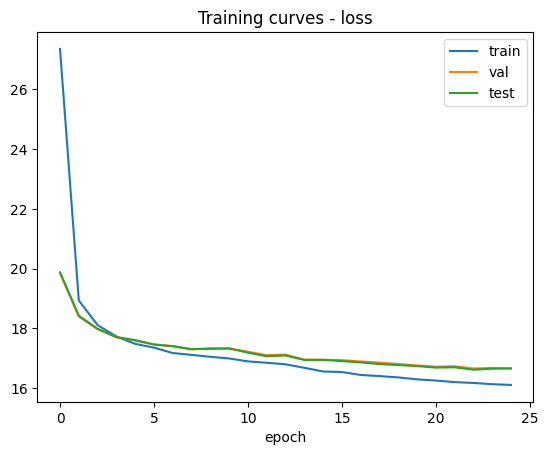

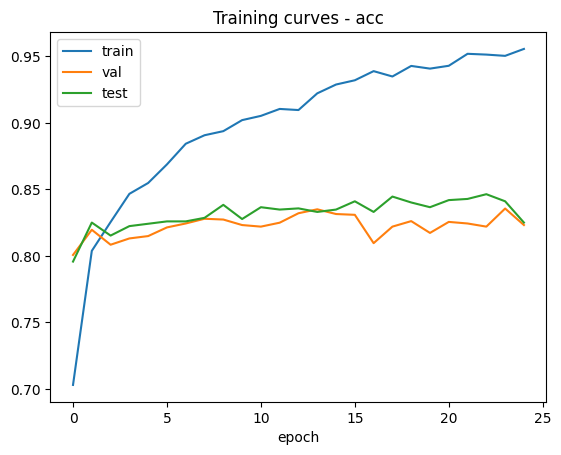

In [16]:
plot_training_curves(training_curves_phase1, phases=['train', 'val', 'test'])

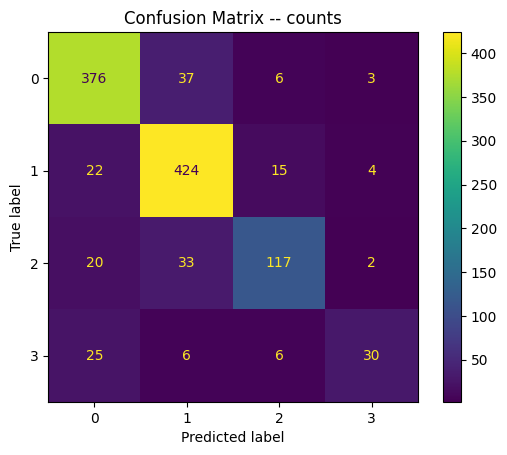

In [19]:
# TODO: Is there a way we can have this visualization for our 43 classes?
res = plot_cm(vgg11_phase1, device, dataloaders, phase='test')

Labels: ['custom404', 'login', 'oldlooking', 'parked']

###Phase 2


In [20]:
# Un-Freeze the weights of the network
for param in vgg11_phase1.parameters():
    param.requires_grad = True

# Phase 2 learning rate.
learning_rate = 0.001
num_epochs = 25


In [21]:
# loss and optimizer
criterion = nn.CrossEntropyLoss() # CrossEntropyLoss for classification!
optimizer = torch.optim.Adam(vgg11_phase1.parameters(), lr=learning_rate)
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.95)
# Train the model. We also will store the results of training to visualize
vgg11_phase2, training_curves_phase2 = train_classification_model(vgg11_phase1, dataloaders, dataset_sizes, 
                                     criterion, optimizer, scheduler, num_epochs=num_epochs)


Epoch 1/25
----------
train Loss: 17.2206 Acc: 0.3839
val   Loss: 12.1479 Acc: 0.3607
test  Loss: 12.1354 Acc: 0.3837

Epoch 2/25
----------
train Loss: 10.9153 Acc: 0.4828
val   Loss: 9.7832 Acc: 0.4725
test  Loss: 9.7562 Acc: 0.4911

Epoch 3/25
----------
train Loss: 9.0784 Acc: 0.5818
val   Loss: 8.4179 Acc: 0.6659
test  Loss: 8.4607 Acc: 0.6581

Epoch 4/25
----------
train Loss: 7.7409 Acc: 0.6983
val   Loss: 7.3622 Acc: 0.7037
test  Loss: 7.3940 Acc: 0.6892

Epoch 5/25
----------
train Loss: 6.8555 Acc: 0.7381
val   Loss: 6.3951 Acc: 0.7723
test  Loss: 6.4491 Acc: 0.7593

Epoch 6/25
----------
train Loss: 6.1902 Acc: 0.7736
val   Loss: 5.7919 Acc: 0.8137
test  Loss: 5.8497 Acc: 0.7993

Epoch 7/25
----------
train Loss: 5.6055 Acc: 0.8053
val   Loss: 5.5185 Acc: 0.8043
test  Loss: 5.5650 Acc: 0.7922

Epoch 8/25
----------
train Loss: 5.1718 Acc: 0.8180
val   Loss: 4.9955 Acc: 0.8315
test  Loss: 5.0517 Acc: 0.8135

Epoch 9/25
----------
train Loss: 4.8140 Acc: 0.8291
val   Loss: 4.

In [23]:
img_labels = dataset.classes
print(img_labels)


['custom404', 'login', 'oldlooking', 'parked']


### Visualizing Training Curves and Results

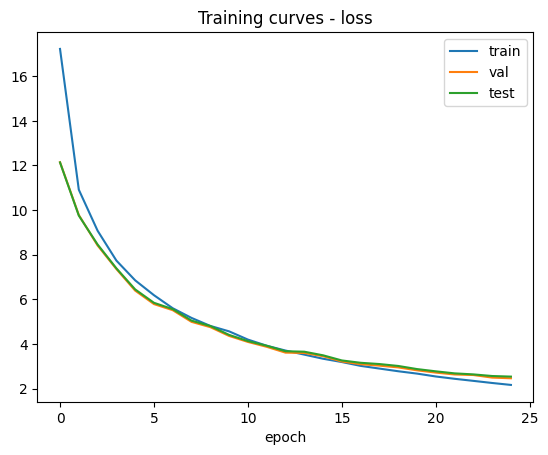

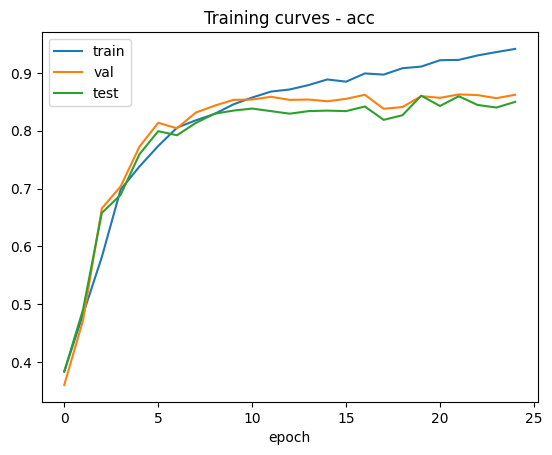

In [24]:
plot_training_curves(training_curves_phase2, phases=['train', 'val', 'test'])

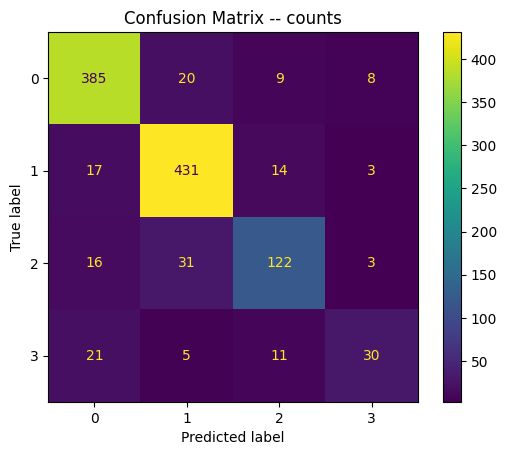

In [25]:
res = plot_cm(vgg11, device, dataloaders, phase='test')

Labels: ['custom404', 'login', 'oldlooking', 'parked']